In [1]:
#負責讀檔

import pandas as pd

# 檔案名稱
file_path = 'processed_new.csv'

try:
    # 嘗試讀取 CSV 檔案
    # pd.read_csv() 會將 CSV 轉為一個 DataFrame 物件
    df = pd.read_csv(file_path)
    
    # (可選) 印出資料的前 5 行，確認讀取成功且內容正確
    print(f"成功讀取檔案： {file_path}")
    print("資料前 5 行預覽：")
    print(df.head())
    
    # (可選) 顯示 DataFrame 的基本資訊 (欄位名稱、資料型態、是否有缺失值)
    print("\n資料基本資訊：")
    df.info()

except FileNotFoundError:
    print(f"錯誤：找不到檔案 '{file_path}'")
    print("請確認：")
    print(f"1. 檔案名稱 '{file_path}' 是否拼寫正確？")
    print("2. 這個 CSV 檔案是否和您的 Python 程式碼在同一個資料夾中？")
    print("3. 如果不在同一個資料夾，請提供完整的絕對路徑。")

except Exception as e:
    print(f"讀取檔案時發生其他錯誤： {e}")

成功讀取檔案： processed_new.csv
資料前 5 行預覽：
   rally  ball_round      time  frame_num  score_status  player_score  \
0      1           1   0:07:39    11496.0           0.0           0.0   
1      1           2  00:07:43    11582.0           0.0           0.0   
2      2           1   0:07:55    11881.0           1.0           1.0   
3      2           2   0:07:56    11900.0           1.0           1.0   
4      2           3   0:07:56    11921.0           1.0           1.0   

   opponent_score          player  server type  ...  moving_x  moving_y  \
0             0.0    Kento MOMOTA     1.0  發短球  ...  0.012041  0.262869   
1             0.0  CHOU Tien Chen     3.0   長球  ... -0.073337  0.594564   
2             0.0    Kento MOMOTA     1.0  發短球  ...  0.011994  0.275664   
3             0.0  CHOU Tien Chen     2.0  推撲球  ... -0.058087  0.142593   
4             0.0    Kento MOMOTA     2.0   殺球  ...  0.158490 -0.000140   

   landing_court_number  ball_distance_x  ball_distance_y   db  set  matc

第一題(wrong)
周天成使用「殺球」得分佔他總得分的百分比是多少？

In [2]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經被載入
if len(df) > 0:
    # 過濾出周天成得分的數據
    chou_points = df[df['getpoint_player'] == 'CHOU Tien Chen']
    
    # 計算周天成總得分
    total_points = len(chou_points)
    
    # 過濾出周天成使用「殺球」得分的數據
    smash_points = chou_points[chou_points['type'] == '殺球']
    
    # 計算周天成使用「殺球」得分的次數
    smash_points_count = len(smash_points)
    
    # 計算百分比
    if total_points > 0:
        smash_percentage = (smash_points_count / total_points) * 100
    else:
        smash_percentage = 0
    
    # 輸出結果
    print(f"周天成使用「殺球」得分佔他總得分的百分比: {smash_percentage:.2f}%")
else:
    print("數據集中沒有可用的數據。")

周天成使用「殺球」得分佔他總得分的百分比: 39.80%


第二題(wrong)
周天成最常使用哪個球種直接得分

周天成最常使用的球種是: 殺球，得分次數為: 78


C:\Users\Danie\AppData\Local\Temp\ipykernel_26252\2287238541.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, ax=ax, palette='viridis')


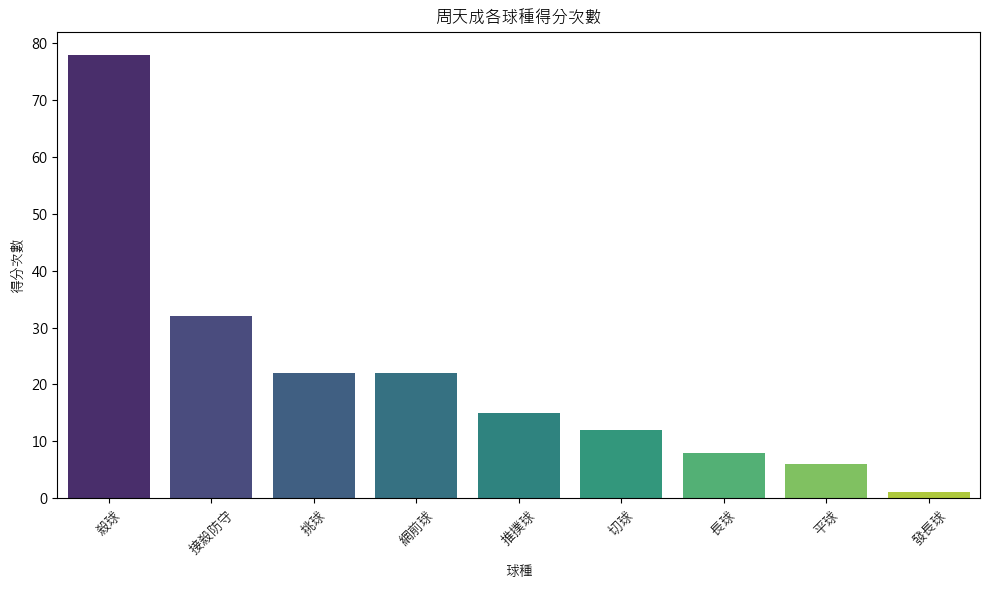

In [3]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經被載入
if len(df) > 0:
    # 過濾出周天成得分的數據
    chou_df = df[df['getpoint_player'] == 'CHOU Tien Chen']
    
    # 計算周天成使用的球種得分次數
    type_counts = chou_df['type'].value_counts()
    
    # 找出最常使用的球種
    most_common_type = type_counts.idxmax()
    most_common_count = type_counts.max()
    
    print(f"周天成最常使用的球種是: {most_common_type}，得分次數為: {most_common_count}")
    
    # 繪製球種得分次數的條形圖
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x=type_counts.index, y=type_counts.values, ax=ax, palette='viridis')
    ax.set_title('周天成各球種得分次數')
    ax.set_xlabel('球種')
    ax.set_ylabel('得分次數')
    plt.xticks(rotation=45)
    plt.tight_layout()
else:
    print("數據集中沒有可用的數據。")

第三題(OK)
針對周天成所有「殺球」，繪製其落點熱區圖。

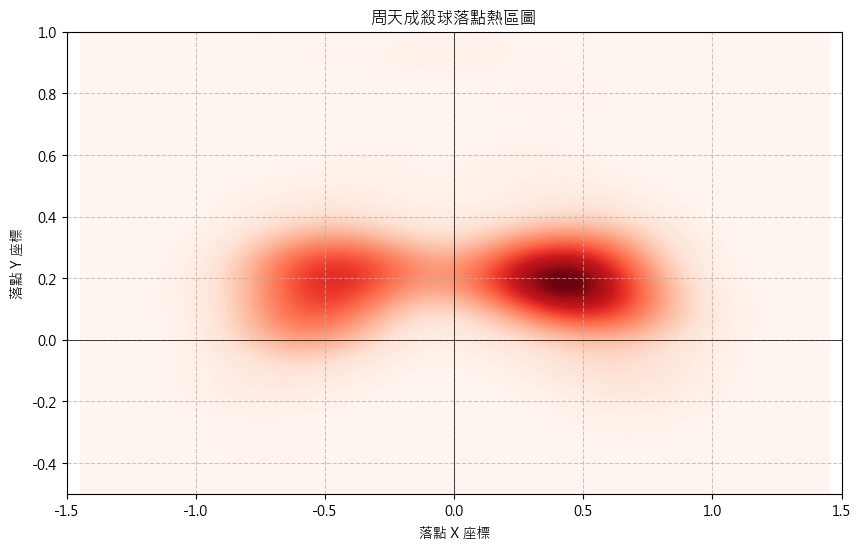

In [4]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經被系統預先載入
if len(df) > 0:
    # 篩選出周天成的殺球數據
    chou_smash_df = df[(df['player'] == 'CHOU Tien Chen') & (df['type'] == '殺球')]

    # 檢查是否有數據
    if len(chou_smash_df) > 0:
        # 繪製落點熱區圖
        plt.figure(figsize=(10, 6))
        sns.kdeplot(
            x=chou_smash_df['landing_x'],
            y=chou_smash_df['landing_y'],
            cmap="Reds", fill=True, thresh=0, levels=100
        )
        plt.title('周天成殺球落點熱區圖')
        plt.xlabel('落點 X 座標')
        plt.ylabel('落點 Y 座標')
        plt.xlim(-1.5, 1.5)
        plt.ylim(-0.5, 1.0)
        plt.axhline(0, color='black', linewidth=0.5)
        plt.axvline(0, color='black', linewidth=0.5)
        plt.grid(True, linestyle='--', alpha=0.7)
        fig = plt.gcf()  # 獲取當前圖表
        plt.show()
    else:
        print("沒有周天成的殺球數據。")
else:
    print("數據框為空。")

第四題(OK)
分析周天成在雙方都達18分以上時的球種分布。

周天成在雙方都達18分以上時的球種分布（百分比）:
type
網前球     32.835821
接殺防守    16.417910
殺球      10.447761
發短球      8.955224
推撲球      8.955224
長球       7.462687
平球       5.970149
挑球       4.477612
切球       4.477612
Name: proportion, dtype: float64


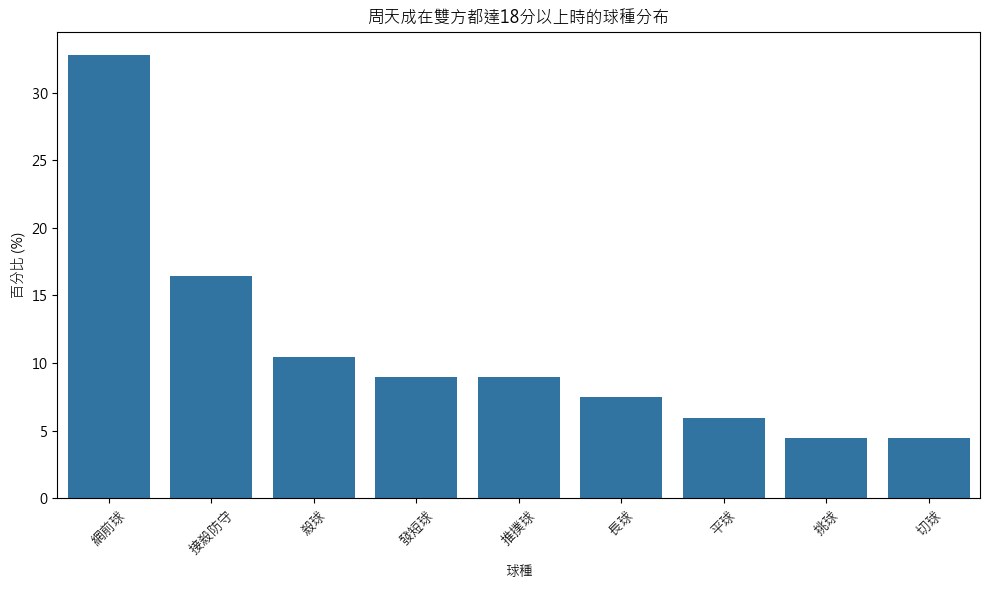

In [5]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經被載入
if len(df) > 0:
    # 篩選出周天成在雙方都達18分以上的數據
    chou_df = df[(df['player'] == 'CHOU Tien Chen') & (df['player_score'] >= 18) & (df['opponent_score'] >= 18)]
    
    # 檢查篩選後的數據量
    if len(chou_df) > 0:
        # 計算球種分布
        type_counts = chou_df['type'].value_counts(normalize=True) * 100
        
        # 打印球種分布百分比
        print("周天成在雙方都達18分以上時的球種分布（百分比）:")
        print(type_counts)
        
        # 繪製球種分布圖
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.barplot(x=type_counts.index, y=type_counts.values, ax=ax)
        ax.set_title('周天成在雙方都達18分以上時的球種分布')
        ax.set_xlabel('球種')
        ax.set_ylabel('百分比 (%)')
        plt.xticks(rotation=45)
        plt.tight_layout()
    else:
        print("沒有符合條件的數據。")
else:
    print("數據框為空。")

第五題(wrong)
幫我繪製周天成得分時球的落點熱區圖

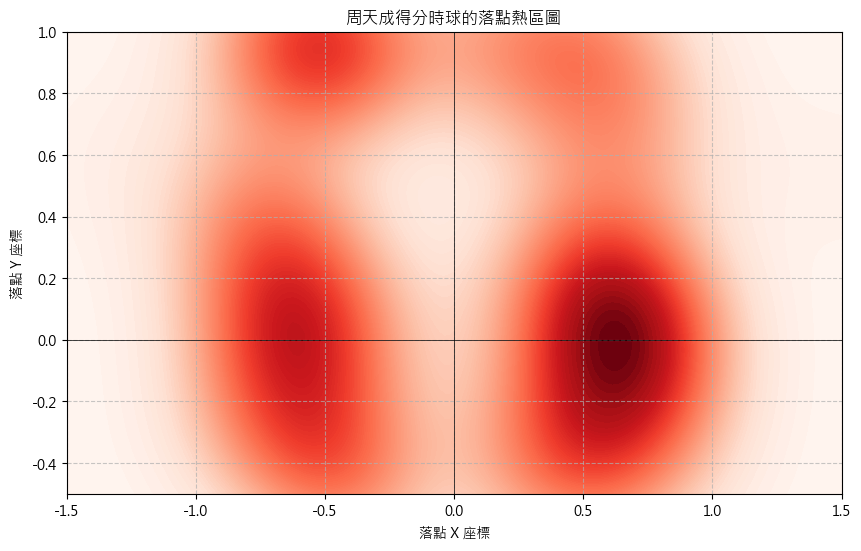

In [6]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經被載入
if len(df) > 0:
    # 過濾出周天成得分的數據
    chou_tien_chen_points = df[df['getpoint_player'] == 'CHOU Tien Chen']

    # 檢查是否有數據
    if len(chou_tien_chen_points) > 0:
        # 繪製熱區圖
        plt.figure(figsize=(10, 6))
        sns.kdeplot(
            data=chou_tien_chen_points,
            x='landing_x',
            y='landing_y',
            fill=True,
            cmap='Reds',
            thresh=0,
            levels=100
        )
        plt.title('周天成得分時球的落點熱區圖')
        plt.xlabel('落點 X 座標')
        plt.ylabel('落點 Y 座標')
        plt.xlim(-1.5, 1.5)
        plt.ylim(-0.5, 1.0)
        plt.axhline(0, color='black', linewidth=0.5)
        plt.axvline(0, color='black', linewidth=0.5)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()
    else:
        print("沒有周天成得分的數據。")
else:
    print("數據框是空的。")

第六題(OK)
在第一場次中，每回合用的拍數，繪圖

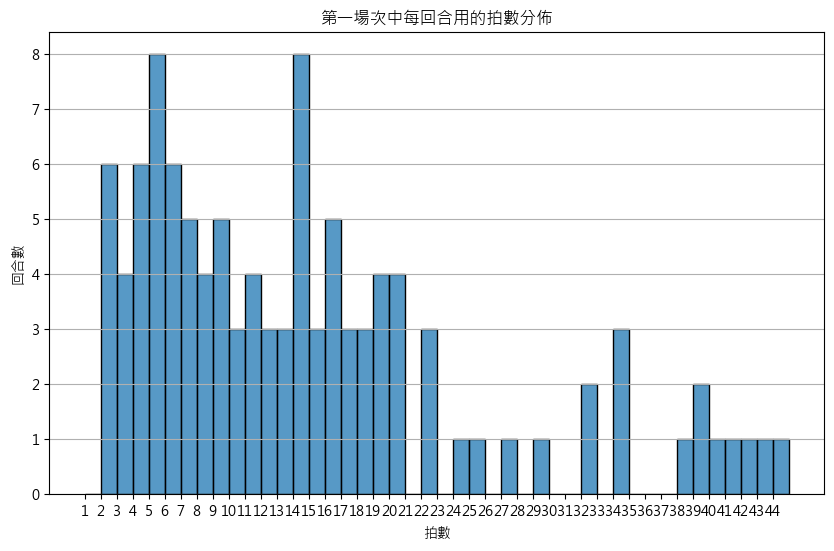

In [8]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經被系統預先載入
if len(df) > 0:
    # 過濾出第一場比賽的數據
    df_first_match = df[df['match_id'] == 1.0]
    
    # 計算每個回合的拍數
    rally_shots = df_first_match.groupby(['set','rally'])['ball_round'].max()
    
    # 繪製直方圖
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.histplot(rally_shots, bins=range(1, rally_shots.max() + 2), kde=False, ax=ax)
    ax.set_title('第一場次中每回合用的拍數分佈')
    ax.set_xlabel('拍數')
    ax.set_ylabel('回合數')
    plt.xticks(range(1, rally_shots.max() + 1))
    plt.grid(axis='y')

    plt.show()
else:
    print("數據集中沒有可用的數據。")

第七題(OK)
繪製周天成殺球時的站點熱區圖

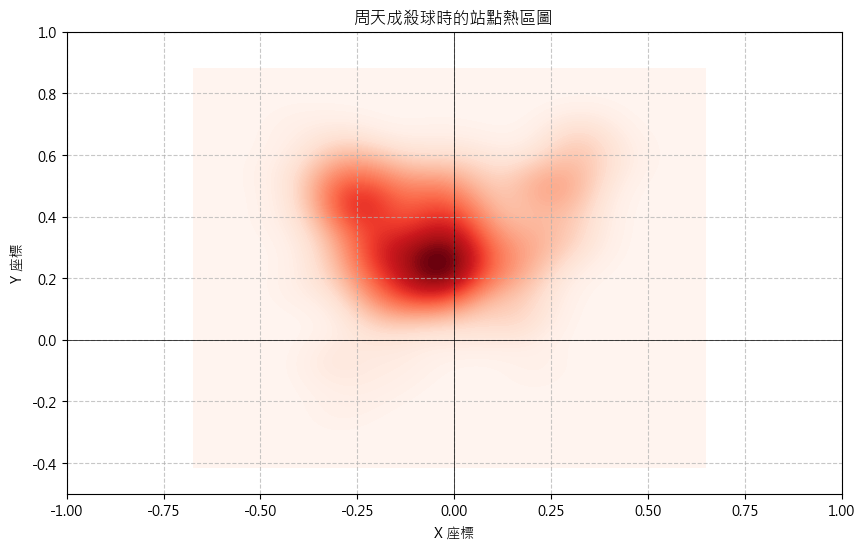

In [9]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經被系統預先載入
if len(df) > 0:
    # 過濾出周天成的殺球數據
    chou_smash_df = df[(df['player'] == 'CHOU Tien Chen') & (df['type'] == '殺球')]

    # 繪製熱區圖
    plt.figure(figsize=(10, 6))
    sns.kdeplot(
        x=chou_smash_df['player_location_x'],
        y=chou_smash_df['player_location_y'],
        cmap="Reds", fill=True, thresh=0, levels=100
    )
    plt.title('周天成殺球時的站點熱區圖')
    plt.xlabel('X 座標')
    plt.ylabel('Y 座標')
    plt.xlim(-1, 1)
    plt.ylim(-0.5, 1)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(True, linestyle='--', alpha=0.7)

    # 顯示圖表
    fig = plt.gcf()
    plt.show()
else:
    print("數據集中沒有可用的數據。")

第八題(wrong)
分析周天成使用殺球，對手都用什麼球種反擊，繪製圓餅圖

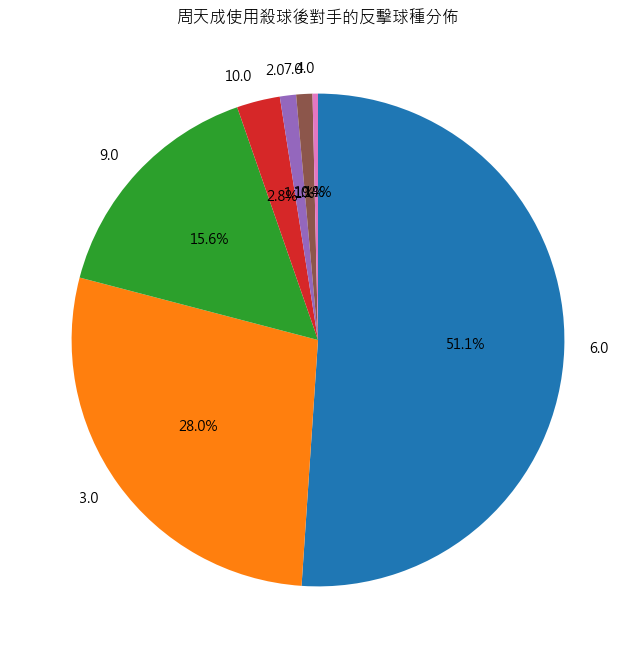

In [10]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s=='Darwin' else ['Microsoft JhengHei', 'SimHei'] if s=='Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經被載入
if len(df) > 0:
    # 選擇周天成使用殺球的情況
    chou_smash_df = df[(df['player'] == 'CHOU Tien Chen') & (df['type'] == '殺球')]
    
    # 計算對手反擊的球種
    opponent_response_types = chou_smash_df['opponent_type'].value_counts()

    # 繪製圓餅圖
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.pie(opponent_response_types, labels=opponent_response_types.index, autopct='%1.1f%%', startangle=90, counterclock=False)
    ax.set_title('周天成使用殺球後對手的反擊球種分佈')
    plt.show()
else:
    print("數據集中沒有可用的數據。")

第九題(OK)
當周天成在「後場」擊球時，他最常使用哪三種球種?

周天成在後場最常使用的三種球種:
長球: 227 次
殺球: 176 次
切球: 175 次


C:\Users\Danie\AppData\Local\Temp\ipykernel_26252\3238878667.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, ax=ax, palette='viridis')


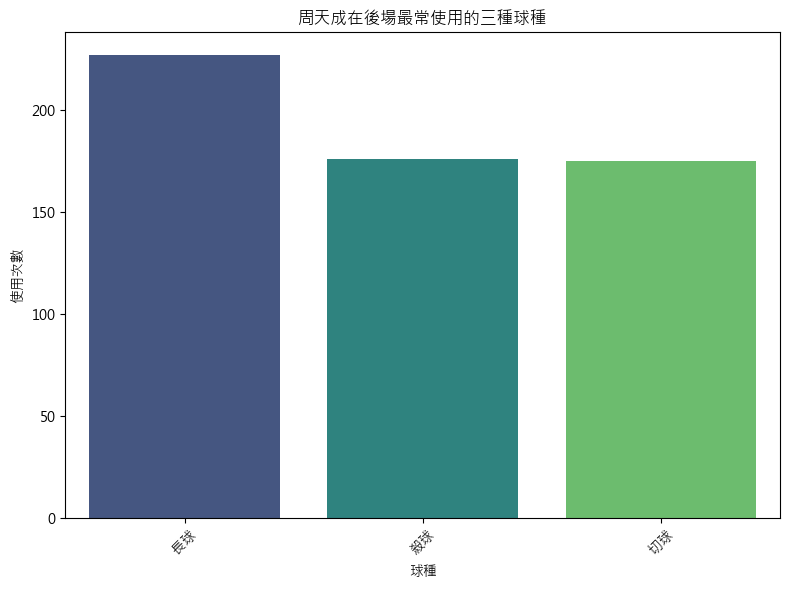

In [11]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s=='Darwin' else ['Microsoft JhengHei', 'SimHei'] if s=='Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經被載入
if len(df) > 0:
    # 選擇周天成在後場擊球的數據
    back_court_areas = [1, 2, 3, 4]
    chou_back_court_hits = df[(df['player'] == 'CHOU Tien Chen') & (df['hit_area'].isin(back_court_areas))]
    
    # 計算球種出現次數
    type_counts = chou_back_court_hits['type'].value_counts().head(3)
    
    # 輸出結果
    print("周天成在後場最常使用的三種球種:")
    for shot_type, count in type_counts.items():
        print(f"{shot_type}: {count} 次")
    
    # 繪製圖表
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.barplot(x=type_counts.index, y=type_counts.values, ax=ax, palette='viridis')
    ax.set_title('周天成在後場最常使用的三種球種')
    ax.set_xlabel('球種')
    ax.set_ylabel('使用次數')
    plt.xticks(rotation=45)
    plt.tight_layout()
else:
    print("數據集中沒有可用的數據。")

第十題(Wrong)
分析周天成站在前中後場，分別的得分與失分數

前場得分: 9, 失分: 13
中場得分: 67, 失分: 93
後場得分: 9, 失分: 54


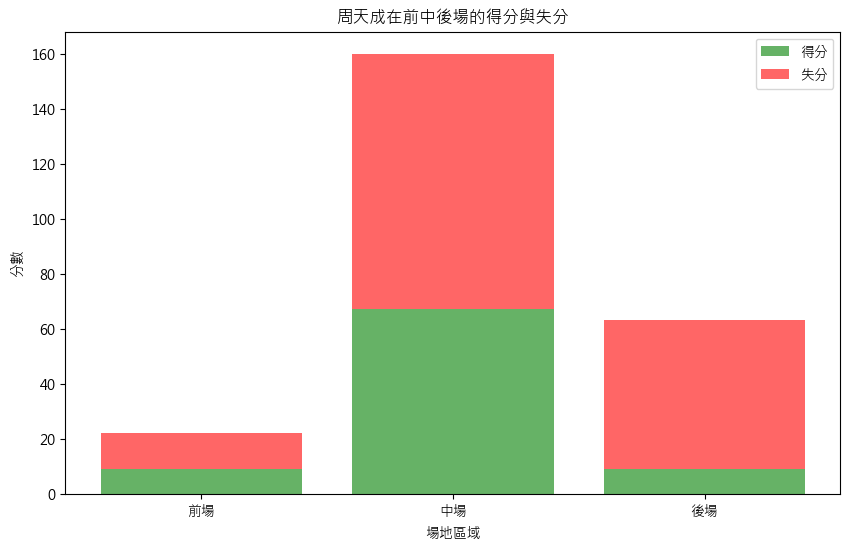

In [12]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經被載入
if len(df) > 0:
    # 過濾出周天成的數據
    chou_df = df[df['player'] == 'CHOU Tien Chen']

    # 定義前中後場區域
    front_court_areas = [17, 18, 19, 20, 21, 22, 23, 24]
    mid_court_areas = [9, 10, 11, 12, 13, 14, 15, 16]
    back_court_areas = [1, 2, 3, 4, 5, 6, 7, 8]

    # 計算得分和失分
    def calculate_points(df, areas):
        points_won = df[(df['player_location_area'].isin(areas)) & (df['getpoint_player'] == 'CHOU Tien Chen')].shape[0]
        points_lost = df[(df['player_location_area'].isin(areas)) & (df['getpoint_player'] != 'CHOU Tien Chen') & (df['getpoint_player'].notna())].shape[0]
        return points_won, points_lost

    front_points_won, front_points_lost = calculate_points(chou_df, front_court_areas)
    mid_points_won, mid_points_lost = calculate_points(chou_df, mid_court_areas)
    back_points_won, back_points_lost = calculate_points(chou_df, back_court_areas)

    # 打印結果
    print(f"前場得分: {front_points_won}, 失分: {front_points_lost}")
    print(f"中場得分: {mid_points_won}, 失分: {mid_points_lost}")
    print(f"後場得分: {back_points_won}, 失分: {back_points_lost}")

    # 繪製圖表
    areas = ['前場', '中場', '後場']
    points_won = [front_points_won, mid_points_won, back_points_won]
    points_lost = [front_points_lost, mid_points_lost, back_points_lost]

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(areas, points_won, label='得分', color='g', alpha=0.6)
    ax.bar(areas, points_lost, label='失分', color='r', alpha=0.6, bottom=points_won)

    ax.set_title('周天成在前中後場的得分與失分')
    ax.set_xlabel('場地區域')
    ax.set_ylabel('分數')
    ax.legend()

    plt.show()
else:
    print("數據集中沒有可用的數據。")

第11題(OK)
當周天成站在前場時，他最主要的得分方式(球種)?

周天成在前場最主要的得分方式是: 殺球，共得分 7 次。


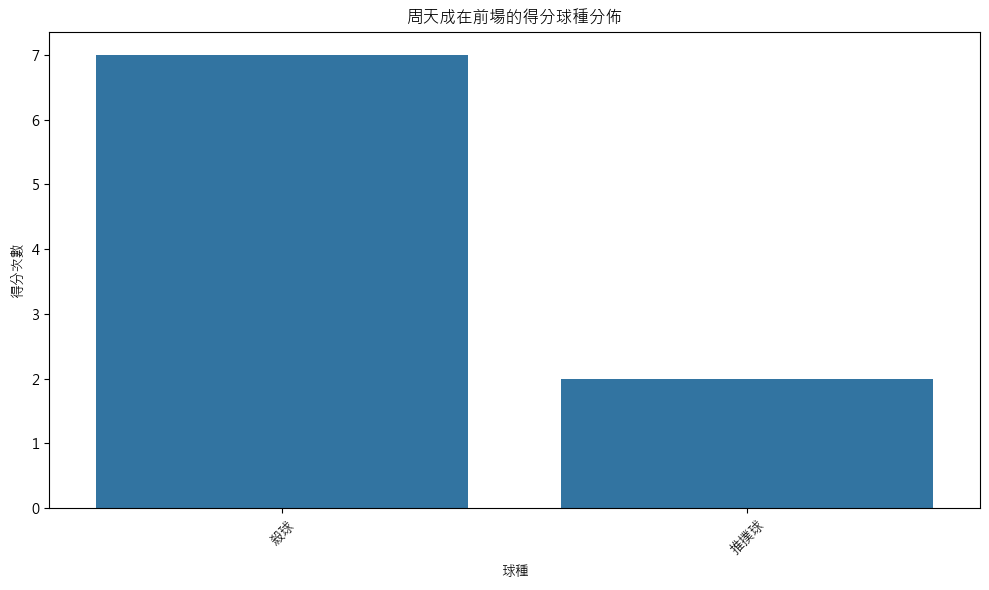

In [13]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經被載入
if len(df) > 0:
    # 過濾出周天成在前場的數據
    front_court_areas = [17, 18, 19, 20, 21, 22, 23, 24]
    chou_front_df = df[(df['player'] == 'CHOU Tien Chen') & (df['player_location_area'].isin(front_court_areas))]

    # 過濾出得分的數據
    chou_front_scores = chou_front_df[chou_front_df['getpoint_player'] == 'CHOU Tien Chen']

    # 計算每種球種的得分次數
    score_by_type = chou_front_scores['type'].value_counts()

    # 找出最主要的得分球種
    main_score_type = score_by_type.idxmax()
    main_score_count = score_by_type.max()

    print(f"周天成在前場最主要的得分方式是: {main_score_type}，共得分 {main_score_count} 次。")

    # 繪製得分球種的分佈圖
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x=score_by_type.index, y=score_by_type.values, ax=ax)
    ax.set_title('周天成在前場的得分球種分佈')
    ax.set_xlabel('球種')
    ax.set_ylabel('得分次數')
    plt.xticks(rotation=45)
    plt.tight_layout()
else:
    print("數據集中沒有可用的數據。")

第12題(OK)
計算周天成站在前場擊球時的落點分布。

C:\Users\Danie\AppData\Local\Temp\ipykernel_26252\3737615081.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=landing_distribution.index, y=landing_distribution.values, palette='viridis', ax=ax)


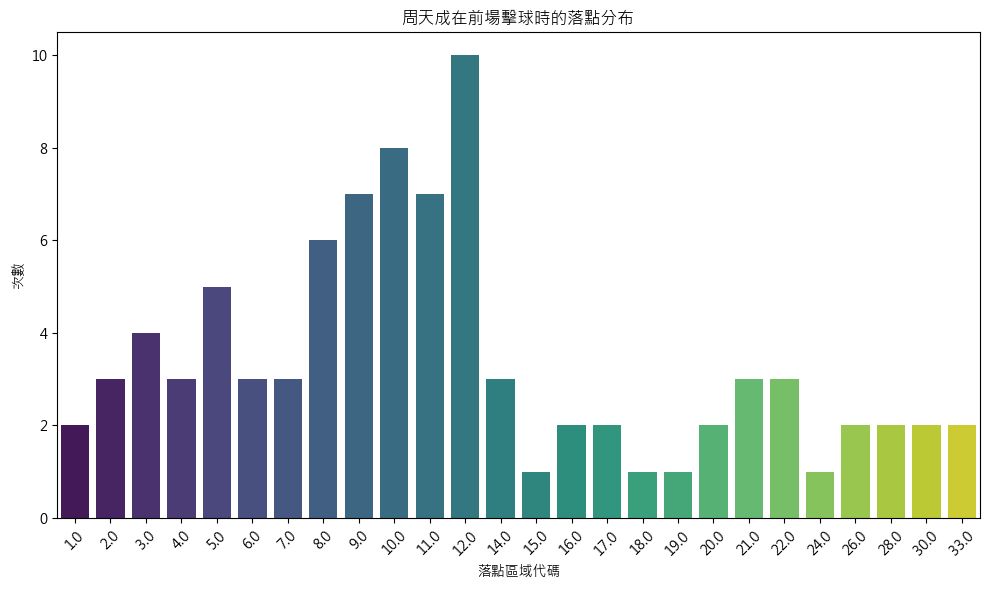

周天成在前場擊球時的落點分布:
landing_area
1.0      2
2.0      3
3.0      4
4.0      3
5.0      5
6.0      3
7.0      3
8.0      6
9.0      7
10.0     8
11.0     7
12.0    10
14.0     3
15.0     1
16.0     2
17.0     2
18.0     1
19.0     1
20.0     2
21.0     3
22.0     3
24.0     1
26.0     2
28.0     2
30.0     2
33.0     2
Name: count, dtype: int64


In [14]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經被載入
if len(df) > 0:
    # 過濾出周天成在前場擊球的數據
    # 前場區域代碼：21, 22, 23, 24, 17, 18, 19, 20
    front_court_areas = [21, 22, 23, 24, 17, 18, 19, 20]
    chou_front_hits = df[(df['player'] == 'CHOU Tien Chen') & (df['player_location_area'].isin(front_court_areas))]

    # 計算落點分布
    landing_distribution = chou_front_hits['landing_area'].value_counts().sort_index()

    # 繪製落點分布圖
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x=landing_distribution.index, y=landing_distribution.values, palette='viridis', ax=ax)
    ax.set_title('周天成在前場擊球時的落點分布')
    ax.set_xlabel('落點區域代碼')
    ax.set_ylabel('次數')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 輸出具體的數值分析結果
    print("周天成在前場擊球時的落點分布:")
    print(landing_distribution)
else:
    print("數據集中沒有可用的數據。")

第13題(wrong)
分析周天成站在前中後場擊球時，自己分別的移動距離

C:\Users\Danie\AppData\Local\Temp\ipykernel_26252\1660271916.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chou_df['move_distance'] = np.sqrt(chou_df['player_move_x']**2 + chou_df['player_move_y']**2)
C:\Users\Danie\AppData\Local\Temp\ipykernel_26252\1660271916.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=court_areas, y=distances, ax=ax, palette='viridis')


前場平均移動距離: 0.23
中場平均移動距離: 0.31
後場平均移動距離: 0.36


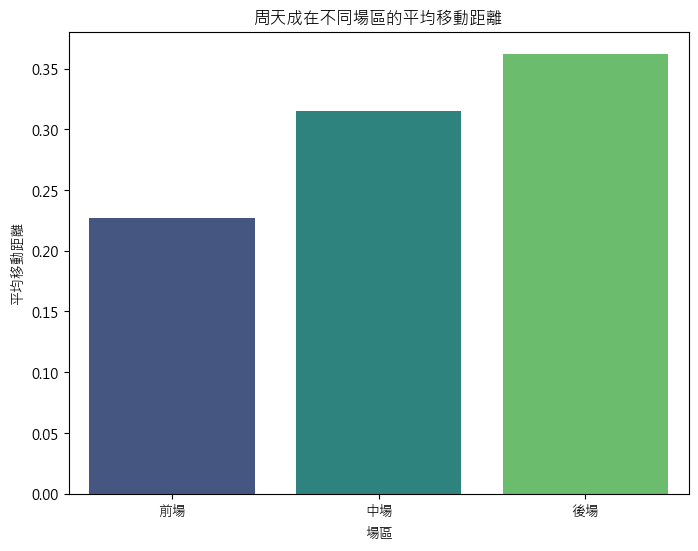

In [15]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經被載入
# 檢查數據量
if len(df) > 0:
    # 過濾出周天成的數據
    chou_df = df[df['player'] == 'CHOU Tien Chen']

    # 定義前中後場區域
    front_court_areas = [21, 22, 23, 24, 17, 18, 19, 20]
    mid_court_areas = [13, 14, 15, 16, 9, 10, 11, 12]
    back_court_areas = [1, 2, 3, 4, 5, 6, 7, 8]

    # 計算移動距離
    chou_df['move_distance'] = np.sqrt(chou_df['player_move_x']**2 + chou_df['player_move_y']**2)

    # 計算各區域的平均移動距離
    front_court_distance = chou_df[chou_df['player_location_area'].isin(front_court_areas)]['move_distance'].mean()
    mid_court_distance = chou_df[chou_df['player_location_area'].isin(mid_court_areas)]['move_distance'].mean()
    back_court_distance = chou_df[chou_df['player_location_area'].isin(back_court_areas)]['move_distance'].mean()

    # 打印結果
    print(f"前場平均移動距離: {front_court_distance:.2f}")
    print(f"中場平均移動距離: {mid_court_distance:.2f}")
    print(f"後場平均移動距離: {back_court_distance:.2f}")

    # 繪製圖表
    fig, ax = plt.subplots(figsize=(8, 6))
    court_areas = ['前場', '中場', '後場']
    distances = [front_court_distance, mid_court_distance, back_court_distance]

    sns.barplot(x=court_areas, y=distances, ax=ax, palette='viridis')
    ax.set_title('周天成在不同場區的平均移動距離')
    ax.set_xlabel('場區')
    ax.set_ylabel('平均移動距離')

    plt.show()
else:
    print("數據集中沒有可用的數據。")

第14題(OK)
幫我統整周天成所有球種的使用比例，以及每種球種的「得分次數」和「失誤次數」。

   type  count  win_count  lose_count  usage_ratio
0   網前球    582        4.0        40.0     0.223074
1  接殺防守    351        5.0        37.0     0.134534
2   推撲球    334        9.0        19.0     0.128018
3    殺球    299       61.0        20.0     0.114603
4    長球    275        2.0        13.0     0.105404
5    挑球    270        0.0        17.0     0.103488
6    切球    211        2.0         7.0     0.080874
7   發短球    147        0.0         0.0     0.056343
8    平球    106        2.0         8.0     0.040629
9   發長球     34        0.0         0.0     0.013032


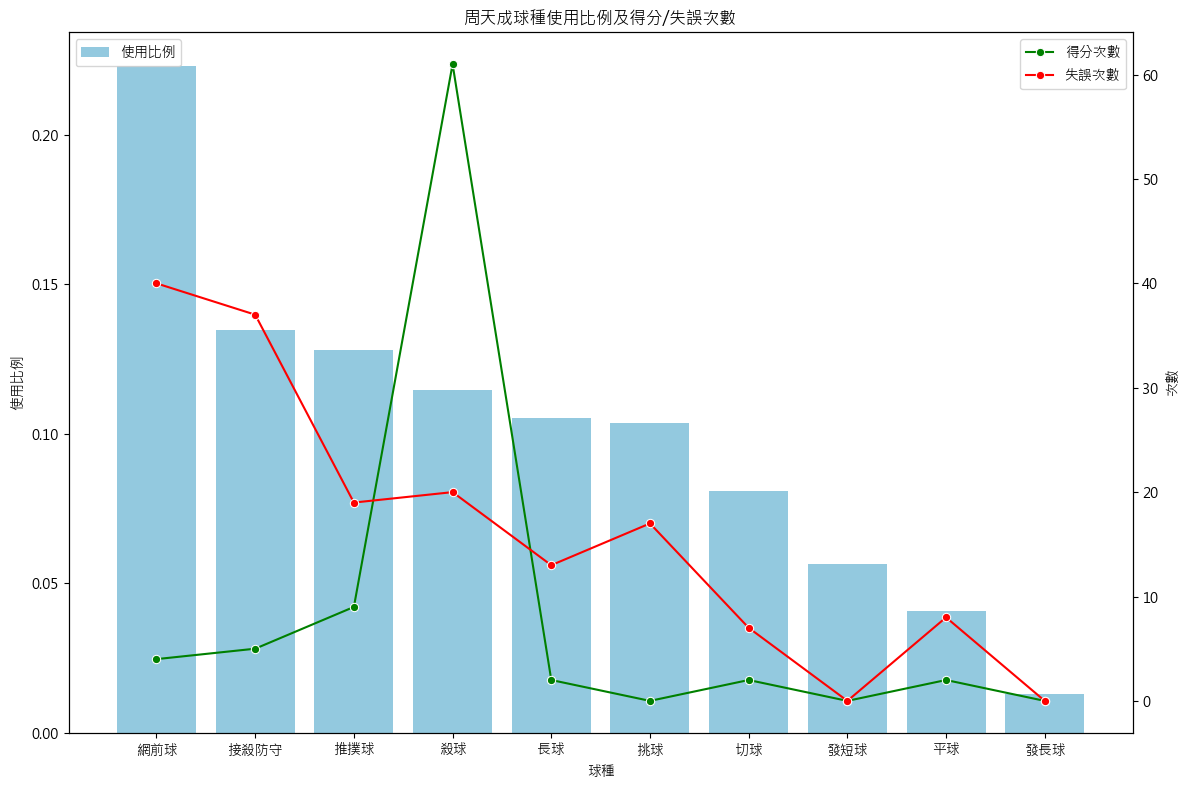

In [16]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經被載入
if len(df) > 0:
    # 篩選出周天成的數據
    chou_df = df[df['player'] == 'CHOU Tien Chen']
    
    # 計算每種球種的使用次數
    type_counts = chou_df['type'].value_counts().reset_index()
    type_counts.columns = ['type', 'count']
    
    # 計算每種球種的得分次數
    win_counts = chou_df[chou_df['getpoint_player'] == 'CHOU Tien Chen']['type'].value_counts().reset_index()
    win_counts.columns = ['type', 'win_count']
    
    # 計算每種球種的失誤次數
    lose_counts = chou_df[chou_df['lose_reason'].notna()]['type'].value_counts().reset_index()
    lose_counts.columns = ['type', 'lose_count']
    
    # 合併數據
    result_df = type_counts.merge(win_counts, on='type', how='left').merge(lose_counts, on='type', how='left').fillna(0)
    
    # 計算使用比例
    result_df['usage_ratio'] = result_df['count'] / result_df['count'].sum()
    
    # 輸出結果
    print(result_df)
    
    # 繪製圖表
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.barplot(data=result_df, x='type', y='usage_ratio', ax=ax, color='skyblue', label='使用比例')
    ax2 = ax.twinx()
    sns.lineplot(data=result_df, x='type', y='win_count', ax=ax2, color='green', marker='o', label='得分次數')
    sns.lineplot(data=result_df, x='type', y='lose_count', ax=ax2, color='red', marker='o', label='失誤次數')
    
    ax.set_title('周天成球種使用比例及得分/失誤次數')
    ax.set_xlabel('球種')
    ax.set_ylabel('使用比例')
    ax2.set_ylabel('次數')
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("數據集中沒有可用的數據。")

第15題(OK)
幫我畫周天成失分原因的圓餅圖

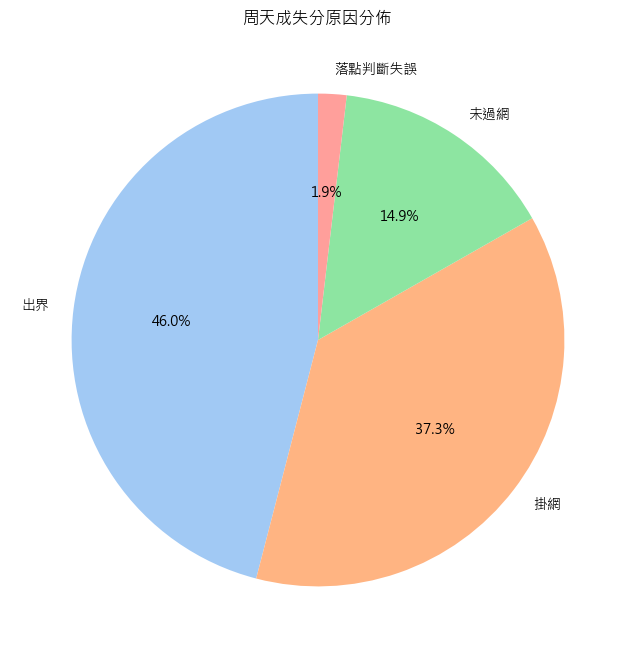

In [17]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經被載入
if len(df) > 0:
    # 過濾出周天成的失分原因
    chou_lose_reasons = df[df['player'] == 'CHOU Tien Chen']['lose_reason'].dropna()

    # 計算每個失分原因的次數
    lose_reason_counts = chou_lose_reasons.value_counts()

    # 繪製圓餅圖
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.pie(lose_reason_counts, labels=lose_reason_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    ax.set_title('周天成失分原因分佈')

    plt.show()
else:
    print("數據集中沒有可用的數據。")

第16題(OK)
在10拍以上的回合中，周天成的得分率是多少？

In [18]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經被載入
if len(df) > 0:
    # 篩選出10拍以上的回合
    df_long_rallies = df[df['ball_round'] > 10]
    
    # 計算周天成在這些回合中的得分次數
    chou_points = df_long_rallies[df_long_rallies['getpoint_player'] == 'CHOU Tien Chen'].shape[0]
    
    # 計算總的10拍以上的回合數
    total_long_rallies = df_long_rallies['rally_id'].nunique()
    
    # 計算得分率
    if total_long_rallies > 0:
        chou_score_rate = chou_points / total_long_rallies
        print(f"周天成在10拍以上的回合中的得分率: {chou_score_rate:.2%}")
    else:
        print("沒有10拍以上的回合數據。")
else:
    print("數據集中沒有數據。")

周天成在10拍以上的回合中的得分率: 47.80%


第17題
